Name : Nirav Bhattad
Roll Number : 23b3307

First, I have done Data Exploration, and found out the 2 Classes as defined in the question, and added labels.

Then, I split the data into test and train, and used supervised learning techniques to classify them.

Then, I used confusion matrix to find out how good my data is.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram as plot_dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
import copy
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fitco.csv')
df.head()

,Sales,SellingPrice,Returned
0,6186.0,88.5,0
1,5392.0,134.0,0
2,5064.0,144.5,0
3,10081.0,132.0,0
4,10053.5,135.5,1


In [3]:
df.describe()

,Sales,SellingPrice,Returned
count,1000.000000,1000.000000,1000.000000
mean,7876.227000,110.565500,0.113000
std,1975.587319,25.600749,0.316751
min,4511.500000,50.500000,0.000000
25%,6017.125000,96.000000,0.000000
50%,7642.000000,114.000000,0.000000
75%,9926.750000,132.000000,0.000000
max,10536.000000,150.000000,1.000000


In [4]:
print(df.isnull().sum())

Sales           0
SellingPrice    0
Returned        0
dtype: int64


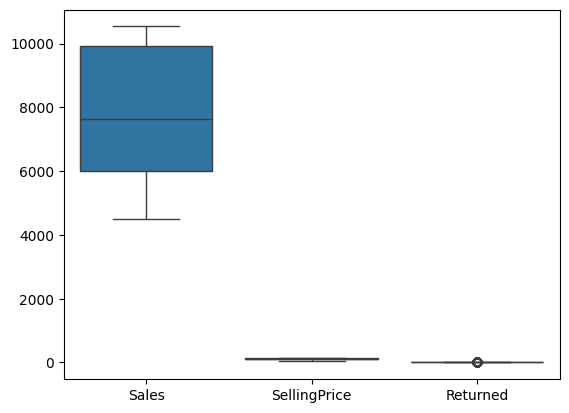

In [5]:
sns.boxplot(data=df[['Sales', 'SellingPrice', 'Returned']])
plt.show()

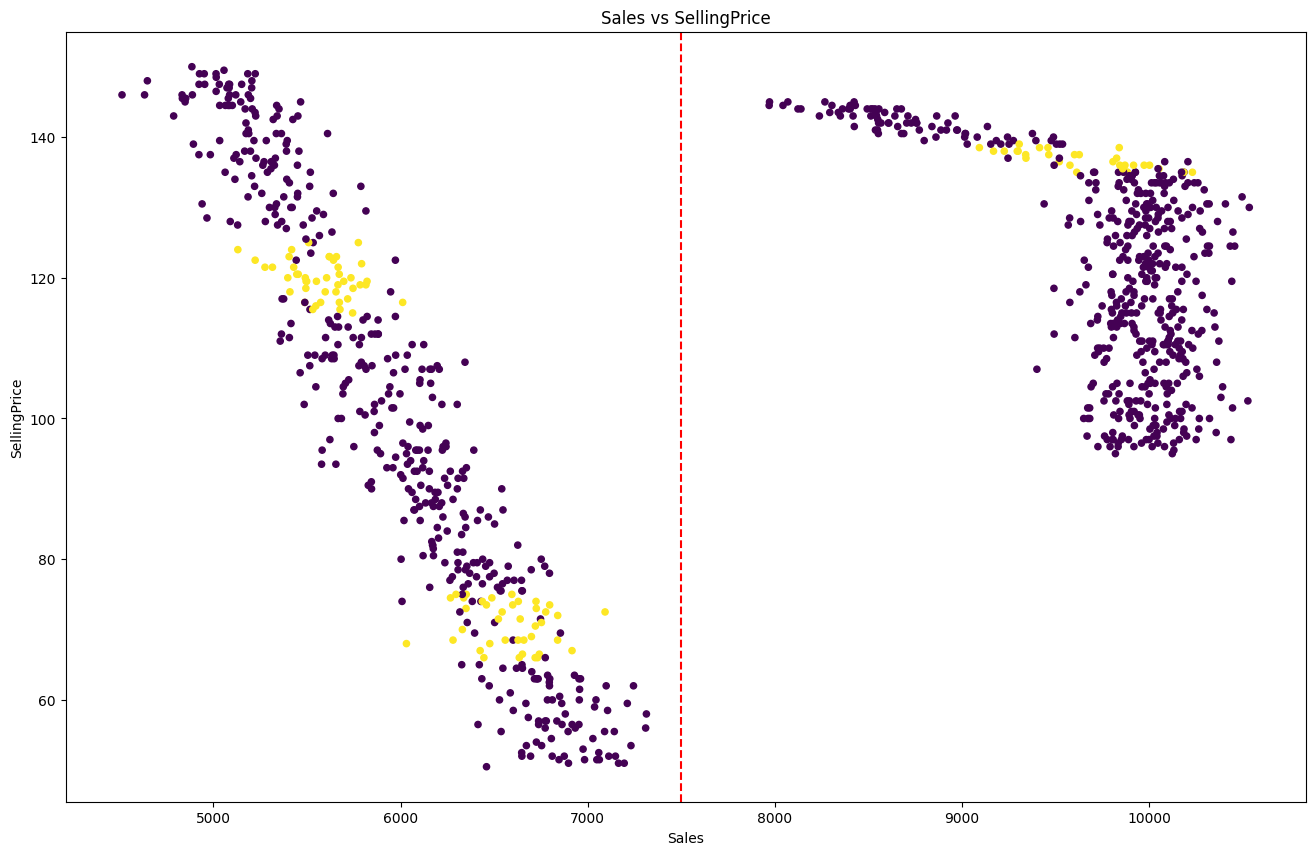

In [6]:
plt.figure(figsize=(16, 10))
plt.axvline(x=7500, color='r', linestyle='--')
plt.scatter(df['Sales'], df['SellingPrice'], c=df['Returned'], cmap='viridis', s=20)
plt.xlabel('Sales')
plt.ylabel('SellingPrice')
plt.title('Sales vs SellingPrice')
plt.show()

In [7]:
df['label'] = df['Sales'].apply(lambda x: 1 if x >= 7500 else 0)

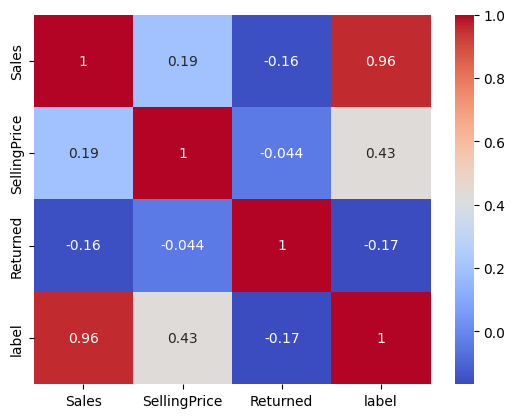

In [8]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficients, but the most popular is Pearson's Correlation Coefficient.

Pearson's correlation coefficient (r) is a measure of the linear relationship between two variables. It's value lies between -1 and +1.

+1: Perfect positive linear relationship. As one variable increases, the other variable also increases. 0: No linear relationship. The two variables do not increase or decrease together. -1: Perfect negative linear relationship. As one variable increases, the other decreases.

# Key Insights 

For Data Class A, SellingPrice and Sales are not correlated at all, as Sales Increases, Selling Price decreases. Sales and Selling Price are not related to Returned at all.

In [9]:
X = df[['SellingPrice', 'label']]
y1 = df['Sales']
y2 = df['Returned']

X_train, X_test, y_train_1, y_test_1, y_train_2, y_test_2  = train_test_split(X, y1, y2, test_size=0.2, random_state=42)


In [10]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Classifier 1' : RandomForestRegressor(min_samples_leaf=1),
    'Random Forest Classifier 2' : RandomForestRegressor(min_samples_leaf=3),
    'Random Forest Classifier 3' : RandomForestRegressor(min_samples_leaf=5, max_depth=5, n_estimators=10),
    'MLPClassifier' : MLPRegressor(hidden_layer_sizes=(10, 10, 10)),
    'KNeighbors Classifier 2' : KNeighborsRegressor(n_neighbors=2),
}

In [11]:
data = []
for name, model in models.items():
    print(f'Training {model}')
    model.fit(X_train, y_train_1)
    y_pred = model.predict(X_test)
    score_sales = model.score(X_test, y_test_1)

    data.append({
        'Model': model,
        'Score for Sales': score_sales,
    })
    
model_data_1 = pd.DataFrame(data)
model_data_1

Training LinearRegression()
Training RandomForestRegressor()
Training RandomForestRegressor(min_samples_leaf=3)
Training RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=10)
Training MLPRegressor(hidden_layer_sizes=(10, 10, 10))
Training KNeighborsRegressor(n_neighbors=2)


,Model,Score for Sales
0,LinearRegression(),0.969611
1,"(DecisionTreeRegressor(max_features=1.0, rando...",0.984759
2,"(DecisionTreeRegressor(max_features=1.0, min_s...",0.987076
3,"(DecisionTreeRegressor(max_depth=5, max_featur...",0.987901
4,"MLPRegressor(hidden_layer_sizes=(10, 10, 10))",-0.384414
5,KNeighborsRegressor(n_neighbors=2),0.982854


In [12]:
data = []
for name, model in models.items():
    print(f'Training {model}')
    model.fit(X_train, y_train_2)
    y_pred = model.predict(X_test)
    score_sales = model.score(X_test, y_test_2)

    data.append({
        'Model_1': model,
        'Score for Returns': score_sales,
    })

model_data_2 = pd.DataFrame(data)
model_data_2

Training LinearRegression()
Training RandomForestRegressor()
Training RandomForestRegressor(min_samples_leaf=3)
Training RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=10)
Training MLPRegressor(hidden_layer_sizes=(10, 10, 10))
Training KNeighborsRegressor(n_neighbors=2)


,Model_1,Score for Returns
0,LinearRegression(),0.009274
1,"(DecisionTreeRegressor(max_features=1.0, rando...",0.652098
2,"(DecisionTreeRegressor(max_features=1.0, min_s...",0.671327
3,"(DecisionTreeRegressor(max_depth=5, max_featur...",0.693616
4,"MLPRegressor(hidden_layer_sizes=(10, 10, 10))",-0.535518
5,KNeighborsRegressor(n_neighbors=2),0.527778


In [13]:
model_data = pd.concat([model_data_1, model_data_2], axis=1)
del model_data['Model_1']
model_data

,Model,Score for Sales,Score for Returns
0,LinearRegression(),0.969611,0.009274
1,"(DecisionTreeRegressor(max_features=1.0, rando...",0.984759,0.652098
2,"(DecisionTreeRegressor(max_features=1.0, min_s...",0.987076,0.671327
3,"(DecisionTreeRegressor(max_depth=5, max_featur...",0.987901,0.693616
4,"MLPRegressor(hidden_layer_sizes=(10, 10, 10))",-0.384414,-0.535518
5,KNeighborsRegressor(n_neighbors=2),0.982854,0.527778


# Analysing the Models for Sales

Linear Regression
Random Forest Classifier 1
Random Forest Classifier 2
Random Forest Classifier 3
MLPClassifier
KNeighbors Classifier 2


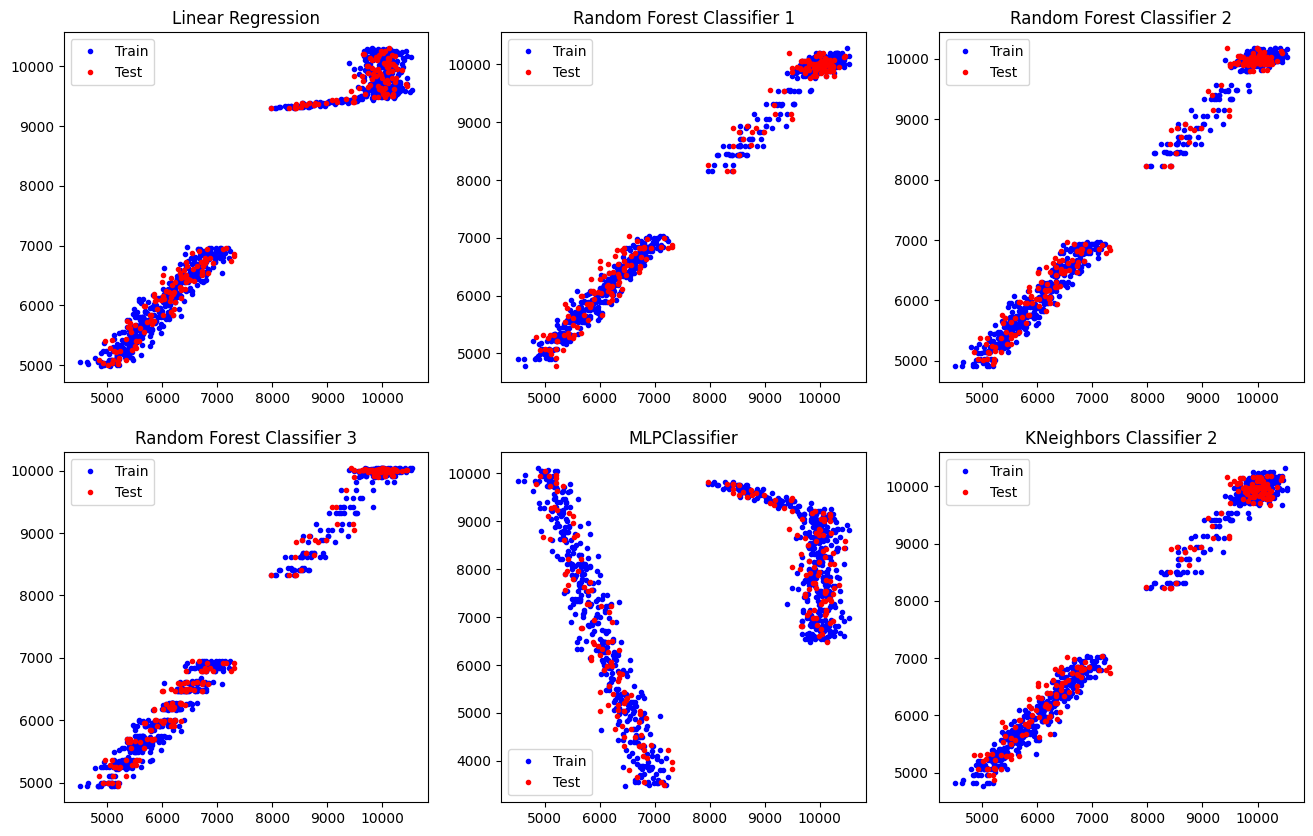

,Model,Accuracy Train,Accuracy Test,MSE Train,MSE Test,RMSE Train,RMSE Test,R2 Train,R2 Test
0,Linear Regression,0.972449,0.969611,1.084321e+05,1.140106e+05,329.290348,337.654558,0.972449,0.969611
1,Random Forest Classifier 1,0.993502,0.984912,2.557525e+04,5.660736e+04,159.922626,237.923015,0.993502,0.984912
2,Random Forest Classifier 2,0.992435,0.987078,2.977255e+04,4.847798e+04,172.547248,220.177149,0.992435,0.987078
3,Random Forest Classifier 3,0.991094,0.987791,3.505106e+04,4.580626e+04,187.219282,214.023976,0.991094,0.987791
4,MLPClassifier,-0.449477,-0.395552,5.704696e+06,5.235707e+06,2388.450526,2288.166757,-0.449477,-0.395552
5,KNeighbors Classifier 2,0.991750,0.982854,3.246979e+04,6.432657e+04,180.193754,253.626836,0.991750,0.982854


In [14]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Accuracy Train': model.score(X_train, y_train),
        'Accuracy Test': model.score(X_test, y_test),
        'MSE Train': mean_squared_error(y_train, y_pred_train),
        'MSE Test': mean_squared_error(y_test, y_pred_test),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'R2 Train': r2_score(y_train, y_pred_train),
        'R2 Test': r2_score(y_test, y_pred_test),
    }
    
    return metrics, y_pred_train, y_pred_test

def plot_results(y_train, y_pred_train, y_test, y_pred_test, model_name, subplot_position):
    plt.subplot(2, 3, subplot_position)
    plt.plot(y_train, y_pred_train, 'o', c='b', markersize=3)
    plt.plot(y_test, y_pred_test, 'o', c='r', markersize=3)
    plt.legend(['Train', 'Test'])
    plt.title(model_name)

sales_model_analysis_list = []
plt.figure(figsize=(16, 10))

for i, model_name in enumerate(models):
    model = copy.deepcopy(models[model_name])
    
    # Evaluate model and get metrics
    metrics, y_pred_train, y_pred_test = evaluate_model(model, X_train, y_train_1, X_test, y_test_1)
    sales_model_analysis_list.append({'Model': model_name, **metrics})

    print(f"{model_name}")
    plot_results(y_train_1, y_pred_train, y_test_1, y_pred_test, model_name, i + 1)

plt.show()

sales_model_analysis = pd.DataFrame(sales_model_analysis_list)
sales_model_analysis


Evaluating Linear Regression
Evaluating Random Forest Classifier 1
Evaluating Random Forest Classifier 2
Evaluating Random Forest Classifier 3
Evaluating MLPClassifier
Evaluating KNeighbors Classifier 2


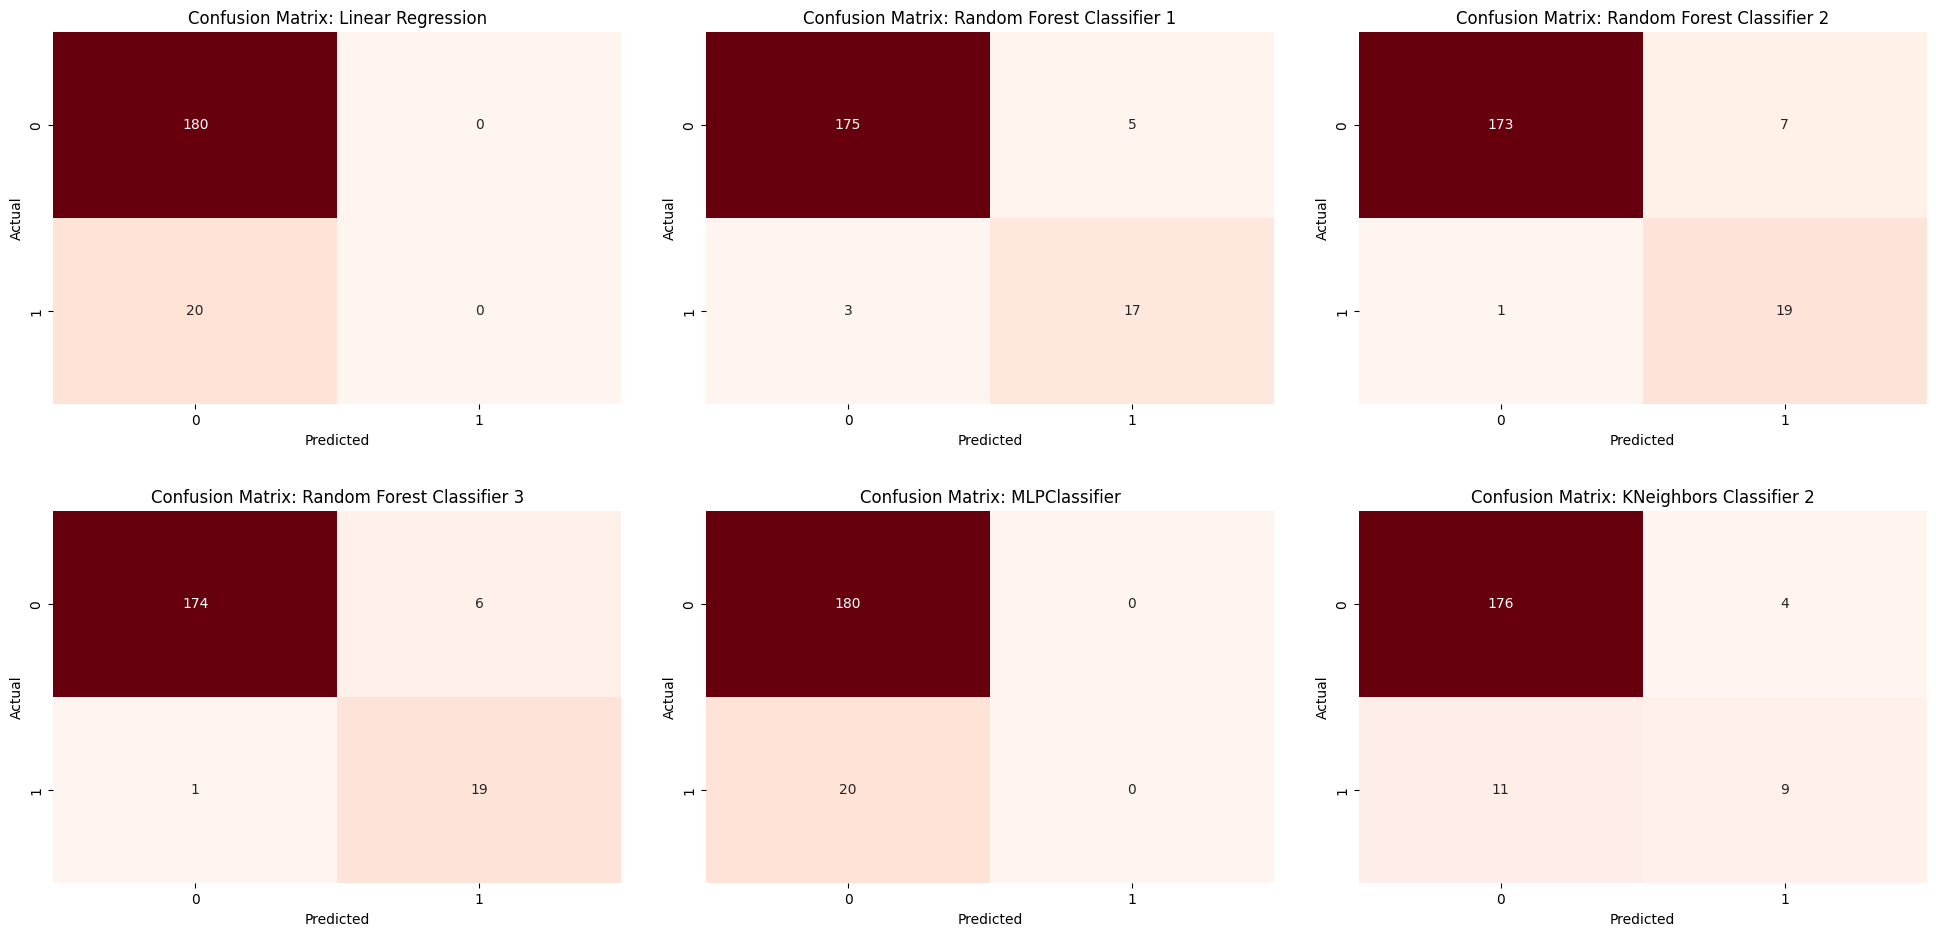

,Model,Accuracy Train,Accuracy Test,MSE Train,MSE Test,RMSE Train,RMSE Test,R2 Train,R2 Test
0,Linear Regression,0.031818,0.009274,0.11625,0.100,0.340955,0.316228,-0.131542,-0.111111
1,Random Forest Classifier 1,0.832330,0.643434,0.02625,0.040,0.162019,0.200000,0.744491,0.555556
2,Random Forest Classifier 2,0.807690,0.677423,0.03125,0.040,0.176777,0.200000,0.695822,0.555556
3,Random Forest Classifier 3,0.719389,0.658620,0.03750,0.035,0.193649,0.187083,0.634987,0.611111
4,MLPClassifier,-0.009353,-0.046901,0.11625,0.100,0.340955,0.316228,-0.131542,-0.111111
5,KNeighbors Classifier 2,0.793159,0.527778,0.03875,0.075,0.196850,0.273861,0.622819,0.166667


In [15]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict and round the predictions
    y_pred_train = np.round(model.predict(X_train))
    y_pred_test = np.round(model.predict(X_test))

    # Calculate metrics
    metrics = {
        'Accuracy Train': model.score(X_train, y_train),
        'Accuracy Test': model.score(X_test, y_test),
        'MSE Train': mean_squared_error(y_train, y_pred_train),
        'MSE Test': mean_squared_error(y_test, y_pred_test),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'R2 Train': r2_score(y_train, y_pred_train),
        'R2 Test': r2_score(y_test, y_pred_test),
    }
    
    return metrics, y_pred_test

def plot_confusion_matrix(y_test, y_pred, model_name, subplot_position):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 3, subplot_position)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
    plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])

def analyze_models(models, X_train, y_train, X_test, y_test):
    return_model_analysis_list = []
    plt.figure(figsize=(20, 10))

    for i, model_name in enumerate(models):
        model = copy.deepcopy(models[model_name])
        
        # Evaluate model and get metrics
        metrics, y_pred_test = evaluate_model(model, X_train, y_train, X_test, y_test)
        return_model_analysis_list.append({'Model': model_name, **metrics})

        print(f"Evaluating {model_name}")
        plot_confusion_matrix(y_test, y_pred_test, model_name, i + 1)

    plt.tight_layout(pad=3.0)  # Increase pad for more spacing
    plt.show()

    return pd.DataFrame(return_model_analysis_list)

return_model_analysis = analyze_models(models, X_train, y_train_2, X_test, y_test_2)
return_model_analysis